In [1]:
%matplotlib inline

import os
import requests
import pandas as pd 
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix

from sklearn import cross_validation as cv
from sklearn.cross_validation import train_test_split as tts

from sklearn.linear_model import Ridge
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [2]:
CUSTOMER = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale customersc data.csv"

In [3]:
def download_data(url, path='data'):
    if not os.path.exists(path):
        os.mkdir(path)

    response = requests.get(url)
    name = os.path.basename(url)
    with open(os.path.join(path, name), 'wb') as f:
        f.write(response.content)

In [4]:
download_data(CUSTOMER)

In [5]:
customer = pd.read_csv(os.path.abspath('data/Wholesale_customers_data.csv'), sep=',')

In [6]:
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
#customer.Channel

In [12]:
#customer.ix[:,0]

In [8]:
customer.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


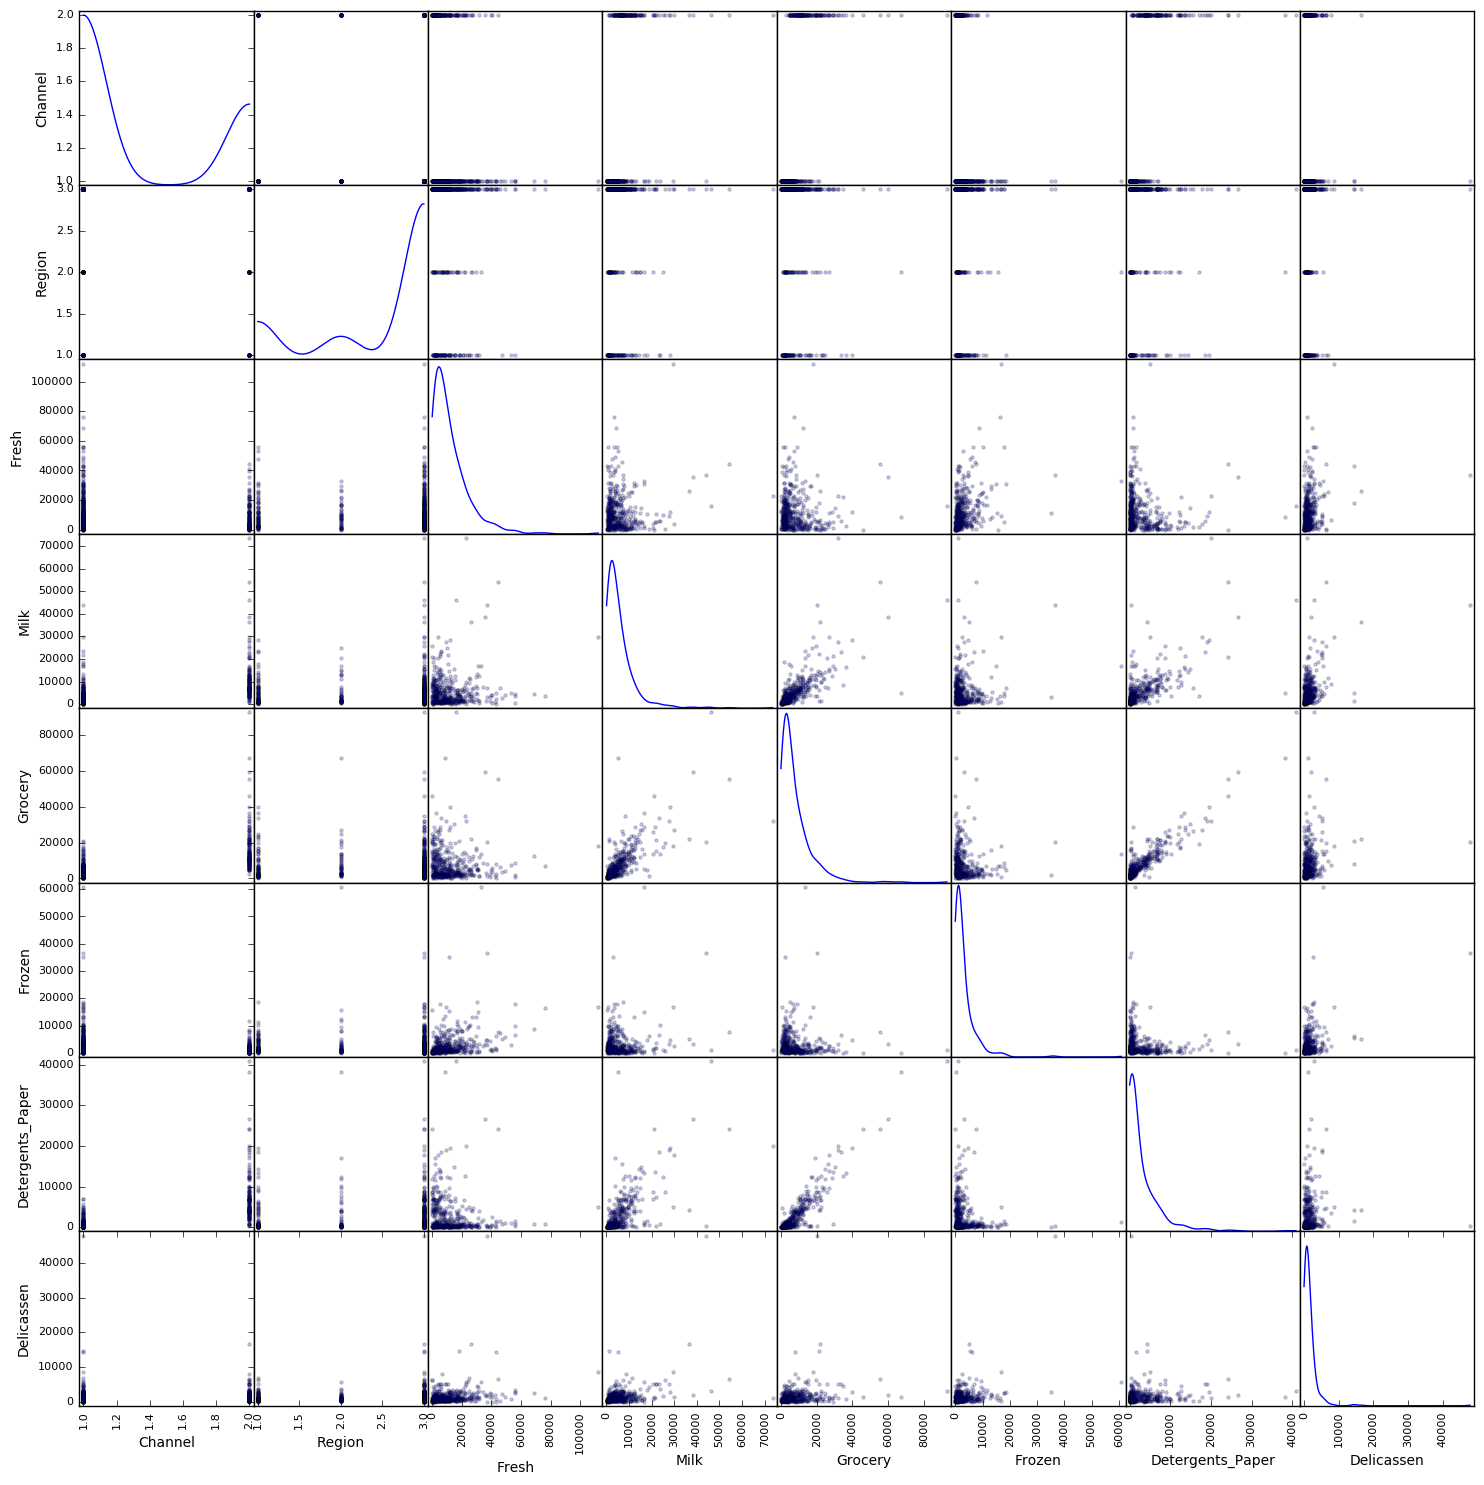

In [9]:
scatter_matrix(customer, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [23]:
customer_features = customer.ix[:,0:7]
customer_labels = customer.ix[:,1:]
#print(customer_labels)

In [15]:
model = RandomizedLasso(alpha=0.1)
model.fit(customer_features, customer_labels["Region"])
names = list(customer_features)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), model.scores_), 
                 names), reverse=True))

Features sorted by their score:
[(0.0, 'Region'), (0.0, 'Milk'), (0.0, 'Grocery'), (0.0, 'Frozen'), (0.0, 'Fresh'), (0.0, 'Detergents_Paper'), (0.0, 'Channel')]


C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ in range(n_resampling)):
C:\Users\spaul\Anaconda3\lib\site-packages\sklearn\linear_model\randomized_l1.py:53: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  for _ 

In [18]:
delicassen_labels = customer.ix[:,7]
#print(delicassen_labels)

In [19]:
splits = cv.train_test_split(customer_features, delicassen_labels, test_size=0.2)
X_train, X_test, y_train, y_test = splits

In [20]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Ridge Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Ridge Regression model
Mean Squared Error: 7101444.319
Coefficient of Determination: -0.989


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Linear Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

Linear Regression model
Mean Squared Error: 7102587.410
Coefficient of Determination: -0.990


In [22]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Random Forest model")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))

Random Forest model
Mean squared error = 15731543.418
R2 score = -3.407
